In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tabulate import tabulate # se debe pegar el siguiente comando en la terminal antes de ejecutar <pip install tabulate>

Para estimar el número total de carpetas de investigación de 2020 se utilizaron modelos polinomiales de grado uno, dos y tres, así como splines cúbicos. El proceso se realizó considerando dos agrupaciones de datos: 1) los datos desagregados por mes desde enero de 2016 hasta mayo de 2020; y, 2) la suma por año de 2016 a 2019.

# Estimaciones mensuales

In [103]:
ls

Aprox_carpetas.png                          README.md
Bases_de_datos_modificadas_violencia.ipynb  datos_estimacion_anual.csv
Denuncias_por_alcaldia.csv                  denuncias_al_anio.csv
Estim_carpetas.png                          denuncias_mensuales.csv
Promedio_denuncias_alcaldia.csv             viol_numero_denuncias_ok.csv


In [104]:
cd Bases_de_datos

[Errno 2] No such file or directory: 'Bases_de_datos'
/home/jovyan/midirectorio/Bases_de_datos


In [105]:
ls

Aprox_carpetas.png                          README.md
Bases_de_datos_modificadas_violencia.ipynb  datos_estimacion_anual.csv
Denuncias_por_alcaldia.csv                  denuncias_al_anio.csv
Estim_carpetas.png                          denuncias_mensuales.csv
Promedio_denuncias_alcaldia.csv             viol_numero_denuncias_ok.csv


In [106]:
violencia_m = pd.read_csv('denuncias_mensuales.csv')

### Manipulación de los datos 

In [107]:
del violencia_m['index']

In [108]:
del violencia_m['anio']

In [109]:
del violencia_m['mes']

In [110]:
arr = violencia_m.to_numpy()

In [111]:
y = arr[:,1]

In [112]:
x = arr[:,0]

### Modelos polinomilaes de grado 1, 2 y 3

In [113]:
coefficients1 = np.polyfit(x,y,1)

In [114]:
coefficients2 = np.polyfit(x,y,2)

In [115]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [116]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

### Evaluación de los datos

In [117]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

### Preparación de los datos para diseñar el eje x

In [118]:
violencia_b = pd.read_csv('denuncias_mensuales.csv')

In [119]:
violencia_b['anio'] = violencia_b['anio'].apply(str)

In [120]:
violencia_b['mes'] = violencia_b['mes'].apply(str)

In [121]:
violencia_b['fecha'] = violencia_b['mes']+' '+ violencia_b['anio']

In [122]:
violencia_b = np.array(violencia_b)

In [123]:
g = violencia_b[:,5]

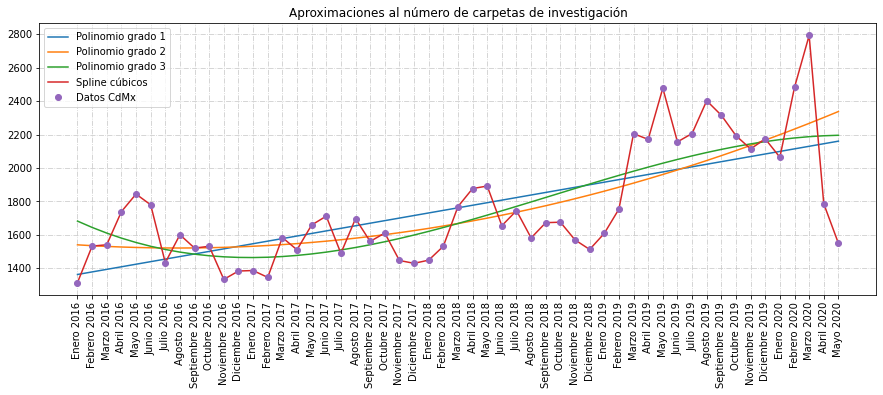

In [124]:
fig = plt.figure(figsize=(15, 5))
plt.plot(g, y_pol_1,
         g, y_pol_2,
         g, y_pol_3,
         g, y_spl, 
         g, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.xticks(rotation='vertical',fontsize=10)
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()

### Estimaciones de abril a diciembre de 2020

In [125]:
x_estim = np.array([53,54,55,56,57,58,59])

In [126]:
y_estim_1 = np.polyval(coefficients1, x_estim)
y_estim_2 = np.polyval(coefficients2, x_estim)
y_estim_3 = np.polyval(coefficients3, x_estim)
f = interp1d(x, y_spl, fill_value='extrapolate')
y_estim_spl = f(x_estim)

### Unión de los datos para graficar

In [127]:
y1 = np.hstack((y_pol_1,y_estim_1))

In [128]:
y2 = np.hstack((y_pol_2,y_estim_2))

In [129]:
y3 = np.hstack((y_pol_3,y_estim_3))

In [130]:
splin = np.hstack((y_spl,y_estim_spl))

In [131]:
w = ["Junio 2020", "Julio 2020", "Agosto 2020", "Septiembre 2020", "Octubre 2020", "Noviembre 2020", "Diciembre 2020"]

In [132]:
x_eval = np.hstack((g,w))

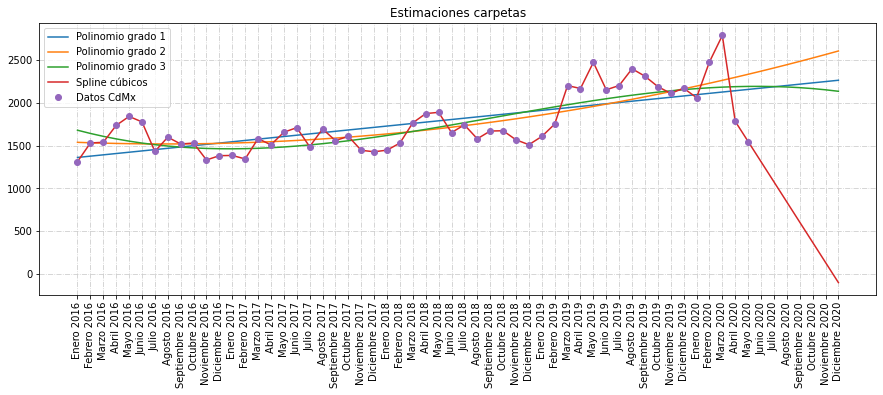

In [133]:
fig = plt.figure(figsize=(15, 5))
plt.plot(x_eval, y1,
         x_eval, y2,
         x_eval, y3,
         x_eval, splin,
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.xticks(rotation='vertical',fontsize=10)
plt.grid(True)
plt.savefig('Estim_carpetas.png')
plt.title("Estimaciones carpetas")
plt.show()

### Error cuadrático medio 

In [134]:
def MSE(y, y_hat):
    """
    Compute mean squared error.
    See: https://en.wikipedia.org/wiki/Mean_squared_error
    Args:
        y (numpy 1d array of floats): actual values of data.
        y_hat (numpy 1d array of floats): estimated values via model.
    Returns:
        ecm (float): mean squared error result.
    """
    m = len(y)
    error = (y-y_hat)**2
    sum_error = sum(error)
    ecm = sum_error/m
    return ecm

In [135]:
MSE_pol_1 = MSE(y, y_pol_1)
MSE_pol_2 = MSE(y, y_pol_2)
MSE_pol_3 = MSE(y, y_pol_3)
MSE_spl = MSE(y, y_spl)

In [136]:
print('Error cuadrático medio')
print(tabulate([['Polinomio 1º', MSE_pol_1], 
                ['Polinomio 2º', MSE_pol_2],
                ['Polinomio 3º', MSE_pol_3],
                ['Spline cúbico', MSE_spl] ], 
               headers=['Modelo', 'Error cuadrático medio (ECM)'],
              floatfmt=".25f"))

Error cuadrático medio
Modelo            Error cuadrático medio (ECM)
-------------  -------------------------------
Polinomio 1º   61125.8476310881087556481361389
Polinomio 2º   54092.4191125236466177739202976
Polinomio 3º   50483.3170088549959473311901093
Spline cúbico      0.0000000000000000000000000


### Conclusiones datos mensuales

El modelo que presentó un mejor ajuste para los datos mensuales fue el spline cúbico, con error cuadrático medio de .000. Lo anterior debido a que se ajusta a cada uno de los puntos observados. Sin embargo,  debido a la caída que se presenta a partir de marzo de 2020  el modelo nos da un cierre para diciembre de -102 carpetas de investigación.  Los otros modelos presentan datos mucho más razonables, aunque las diferencias entre los datos proporcionados por la Ciudad de México y los estimados son muy grandes Dados estos resultados se inició el trabajo con los datos agrupados de forma anual.

# Estimaciones anuales

### Descarga de datos

In [137]:
violencia_a = pd.read_csv("denuncias_al_anio.csv")

In [138]:
violencia_a

,Unnamed: 0,anio,denuncias_anio
0,0,2016,18558
1,1,2017,18435
2,2,2018,19933
3,3,2019,25776
4,4,2020,10674


### Manipulación de datos

In [139]:
v = np.array(violencia_a.drop([4]))

In [140]:
y = v[:,2]

In [141]:
y

array([18558, 18435, 19933, 25776])

In [142]:
x = v[:,1]

In [143]:
x

array([2016, 2017, 2018, 2019])

### Modelos polinomilaes de grado 1, 2 y 3

In [144]:
coefficients1 = np.polyfit(x,y,1)

In [145]:
coefficients2 = np.polyfit(x,y,2)

In [146]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [147]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

### Evaluación de los datos

In [148]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

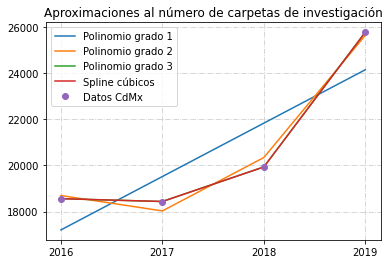

In [149]:
plt.plot(x, y_pol_1,
         x, y_pol_2,
         x, y_pol_3,
         x, y_spl, 
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.locator_params(axis = 'x', nbins = 4)
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()

### Estimaciones para 2020 y 2021

In [150]:
x_estim = np.array([2020,2021])

In [151]:
y_estim_1 = np.polyval(coefficients1, x_estim)
y_estim_2 = np.polyval(coefficients2, x_estim)
y_estim_3 = np.polyval(coefficients3, x_estim)
f = interp1d(x, y_spl, fill_value='extrapolate')
y_estim_spl = f(x_estim)

In [152]:
x_eval = np.arange(2016, 2022, 1)

In [153]:
y1 = (y_pol_1[0],y_pol_1[1],y_pol_1[2],y_pol_1[3],y_estim_1[0],y_estim_1[1])

In [154]:
y2 = (y_pol_2[0],y_pol_2[1],y_pol_2[2],y_pol_2[3],y_estim_2[0],y_estim_2[1])

In [155]:
y3 = (y_pol_3[0],y_pol_3[1],y_pol_3[2],y_pol_3[3],y_estim_3[0],y_estim_3[1])

In [156]:
splin = (y_spl[0],y_spl[1],y_spl[2],y_spl[3],y_estim_spl[0],y_estim_spl[1])

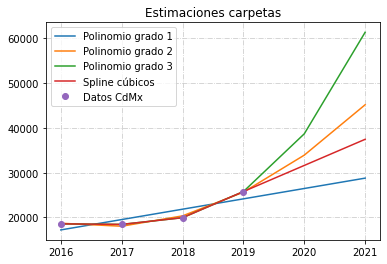

In [157]:
plt.plot(x_eval, y1,
         x_eval, y2,
         x_eval, y3,
         x_eval, splin,
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Estim_carpetas.png')
plt.title("Estimaciones carpetas")
plt.show()

In [158]:
print(tabulate([['2020', y_estim_1[0], y_estim_2[0], y_estim_3[0], y_estim_spl[0]], 
                ['2021', y_estim_1[1], y_estim_2[1], y_estim_3[1], y_estim_spl[1]]], 
               headers=['Año', 'Polinomio 1º', 'Polinomio 2º', 'Polinomio 3º', 'Spline cúbico'],
              floatfmt=".2f"))

  Año    Polinomio 1º    Polinomio 2º    Polinomio 3º    Spline cúbico
-----  --------------  --------------  --------------  ---------------
 2020        26463.50        33921.00        38688.00         31619.00
 2021        28778.70        45185.20        61392.99         37462.00


### Error cuadrático medio 

In [159]:
def MSE(y, y_hat):
    """
    Compute mean squared error.
    See: https://en.wikipedia.org/wiki/Mean_squared_error
    Args:
        y (numpy 1d array of floats): actual values of data.
        y_hat (numpy 1d array of floats): estimated values via model.
    Returns:
        ecm (float): mean squared error result.
    """
    m = len(y)
    error = (y-y_hat)**2
    sum_error = sum(error)
    ecm = sum_error/m
    return ecm

In [160]:
MSE_pol_1 = MSE(y, y_pol_1)
MSE_pol_2 = MSE(y, y_pol_2)
MSE_pol_3 = MSE(y, y_pol_3)
MSE_spl = MSE(y, y_spl)

In [161]:
print('Error cuadrático medio')
print(tabulate([['Polinomio 1º', MSE_pol_1], 
                ['Polinomio 2º', MSE_pol_2],
                ['Polinomio 3º', MSE_pol_3],
                ['Spline cúbico', MSE_spl] ], 
               headers=['Modelo', 'Error cuadrático medio (ECM)'],
              floatfmt=".25f"))

Error cuadrático medio
Modelo              Error cuadrático medio (ECM)
-------------  ---------------------------------
Polinomio 1º   2317324.4500001268461346626281738
Polinomio 2º     92752.1998701095581054687500000
Polinomio 3º         0.0000113844871520996093750
Spline cúbico        0.0000000000000000000000033


### Conclusiones

Trabajando con los datos anuales se  contrarresta la gran caída a partir de marzo de 2020 con el incremento registrado en los dos primeros meses. De esta forma, decidimos mantener la estimación con datos anules De la misma manera, que con los datos mensuales, el modelo que presenta la mejor estimación dado la diferencia entre los datos que se estiman y los que observamos es el spline cúbico, seguido por el polinomio de grado tres. Este último, presentó un pendiente mucho más alta que el spline cúbico, el cual  el incrementó de forma más moderada. Por tanto, concluimos que el número total de carpetas que debemos reportar es el estimado por el spline cúbico  anual de 31,619
 
También se realizó la estimación para 2021 donde el polinomio de grado tres arroja para 2021 61,392 carpetas que es 113% por encima de la estimación del polinomio grado uno. Por las misma razones, antes descrita, concluimos reportar la estimación de 37, 462 dada por el spline cúbico.